# Multiple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline


In [2]:
sns.set()

In [3]:
df = pd.read_csv('finaldoc.csv')

In [4]:
df

,Lat,Long,Temp,Year,Month,Prec,Temp.1
0,-34.5,83.5,-23.988876,2010,1.0,11.558559,NaN
1,-34.5,83.0,-26.936960,2010,1.0,13.478873,NaN
2,-34.5,82.5,-27.375190,2010,1.0,14.451389,NaN
3,-34.5,82.0,-27.680346,2010,1.0,21.071506,NaN
4,-34.5,81.5,-24.050677,2010,1.0,22.390317,NaN
...,...,...,...,...,...,...,...
4139635,-11.0,8.5,32.653022,2014,12.0,46.644885,NaN
4139636,-11.0,8.0,32.540390,2014,12.0,56.889470,NaN
4139637,-11.0,7.5,32.154972,2014,12.0,58.957181,NaN
4139638,-11.0,7.0,31.281443,2014,12.0,78.206428,NaN


## Preprocessing

In [5]:
df = df.drop(columns=['Temp.1'])

In [6]:
print(df)

          Lat  Long       Temp  Year  Month        Prec
0       -34.5  83.5 -23.988876  2010    1.0   11.558559
1       -34.5  83.0 -26.936960  2010    1.0   13.478873
2       -34.5  82.5 -27.375190  2010    1.0   14.451389
3       -34.5  82.0 -27.680346  2010    1.0   21.071506
4       -34.5  81.5 -24.050677  2010    1.0   22.390317
...       ...   ...        ...   ...    ...         ...
4139635 -11.0   8.5  32.653022  2014   12.0   46.644885
4139636 -11.0   8.0  32.540390  2014   12.0   56.889470
4139637 -11.0   7.5  32.154972  2014   12.0   58.957181
4139638 -11.0   7.0  31.281443  2014   12.0   78.206428
4139639 -11.0   6.5  30.642846  2014   12.0  103.768592

[4139640 rows x 6 columns]


In [7]:
df['Temp'] = round(df['Temp'],1)
df['Prec'] = round(df['Prec'],1)
df.head()

,Lat,Long,Temp,Year,Month,Prec
0,-34.5,83.5,-24.0,2010,1.0,11.6
1,-34.5,83.0,-26.9,2010,1.0,13.5
2,-34.5,82.5,-27.4,2010,1.0,14.5
3,-34.5,82.0,-27.7,2010,1.0,21.1
4,-34.5,81.5,-24.1,2010,1.0,22.4


In [8]:
df = df.dropna()
df

,Lat,Long,Temp,Year,Month,Prec
0,-34.5,83.5,-24.0,2010,1.0,11.6
1,-34.5,83.0,-26.9,2010,1.0,13.5
2,-34.5,82.5,-27.4,2010,1.0,14.5
3,-34.5,82.0,-27.7,2010,1.0,21.1
4,-34.5,81.5,-24.1,2010,1.0,22.4
...,...,...,...,...,...,...
4139635,-11.0,8.5,32.7,2014,12.0,46.6
4139636,-11.0,8.0,32.5,2014,12.0,56.9
4139637,-11.0,7.5,32.2,2014,12.0,59.0
4139638,-11.0,7.0,31.3,2014,12.0,78.2


### Splitting Testing and training dataset

In [9]:
X = df[['Lat', 'Long', 'Prec','Year','Month']]
y = df['Temp']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Training Model

In [11]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [12]:
reg.score(X_test,y_test)

0.4760629557282128

In [13]:
reg.predict([[-34.5,82.0,21.1,2010,1.0]])

array([-6.89085078])

# Polynomial (Degree = 3)

In [13]:
poly = PolynomialFeatures(degree=3, include_bias=False)

In [14]:
X_poly = poly.fit_transform(X_train)

In [15]:
poly.fit(X_poly,y_train)

PolynomialFeatures(degree=3, include_bias=False)

In [16]:
lin2 = LinearRegression()

In [17]:
lin2.fit(X_poly,y_train)

LinearRegression()

In [18]:
lin2.score(poly.fit_transform(X_test),y_test)

0.882771153990912

In [19]:
lin2.score(X_poly,y_train)

0.8830372040541667

In [20]:
ya2 = lin2.predict(poly.fit_transform(X_test))[1000:100000:500]

In [21]:
ya1 = y_test[1000:100000:500]

In [22]:
r2 = lin2.score(poly.fit_transform(X_test),y_test)
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8827704340216812

In [23]:
xa = np.arange(1,199)

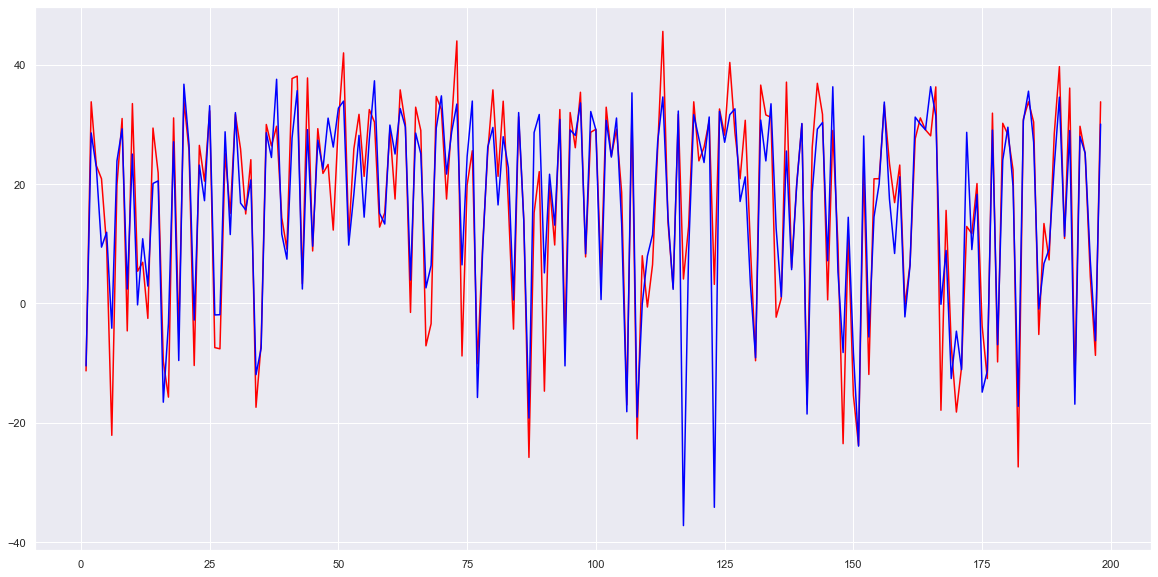

In [24]:
plt.figure(figsize=[20,10])
plt.plot(xa, ya1, label = "line 1",color='red')
plt.plot(xa, ya2, label = "line 2",color='blue')
plt.show()

# Polynomial (Degree = 4)

In [14]:
poly = PolynomialFeatures(degree=4, include_bias=False)

In [15]:
X_poly = poly.fit_transform(X_train)

In [16]:
poly.fit(X_poly,y_train)

PolynomialFeatures(degree=4, include_bias=False)

In [17]:
lin2 = LinearRegression()

In [18]:
lin2.fit(X_poly,y_train)

LinearRegression()

In [19]:
lin2.score(poly.fit_transform(X_test),y_test)

0.9122834889505019

In [20]:
lin2.score(X_poly,y_train)

0.91259915436759

In [21]:
ya2 = lin2.predict(poly.fit_transform(X_test))[1000:100000:500]

In [22]:
ya1 = y_test[1000:100000:500]

In [23]:
r2 = lin2.score(poly.fit_transform(X_test),y_test)
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.912282950233359

In [24]:
xa = np.arange(1,199)

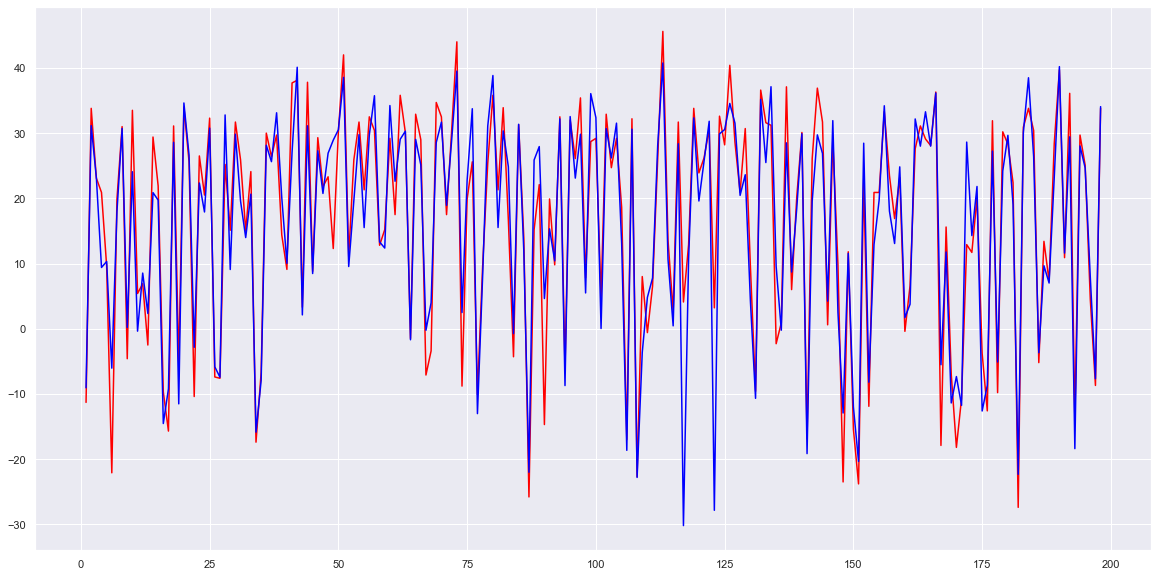

In [25]:
plt.figure(figsize=[20,10])
plt.plot(xa, ya1, label = "line 1",color='red')
plt.plot(xa, ya2, label = "line 2",color='blue')
plt.show()

# Saving Model

In [79]:
import pickle

In [80]:
with open('Poly4_model','wb') as f:
    pickle.dump(lin2,f)

In [81]:
with open('Poly4_model','rb') as f:
    poly_model = pickle.load(f)

# Poly Degree = 5 

In [37]:
poly = PolynomialFeatures(degree=5, include_bias=False)

In [38]:
X_poly = poly.fit_transform(X_train)

In [39]:
poly.fit(X_poly,y_train)

PolynomialFeatures(degree=5, include_bias=False)

In [40]:
lin2 = LinearRegression()

In [41]:
lin2.fit(X_poly,y_train)

LinearRegression()

In [42]:
lin2.score(poly.fit_transform(X_test),y_test)

0.9306314663551946

In [43]:
lin2.score(X_poly,y_train)

0.9306421711385949

In [44]:
ya2 = lin2.predict(poly.fit_transform(X_test))[1000:100000:500]

In [45]:
ya1 = y_test[1000:100000:500]

In [46]:
r2 = lin2.score(poly.fit_transform(X_test),y_test)
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.9306310403234497

In [47]:
xa = np.arange(1,199)

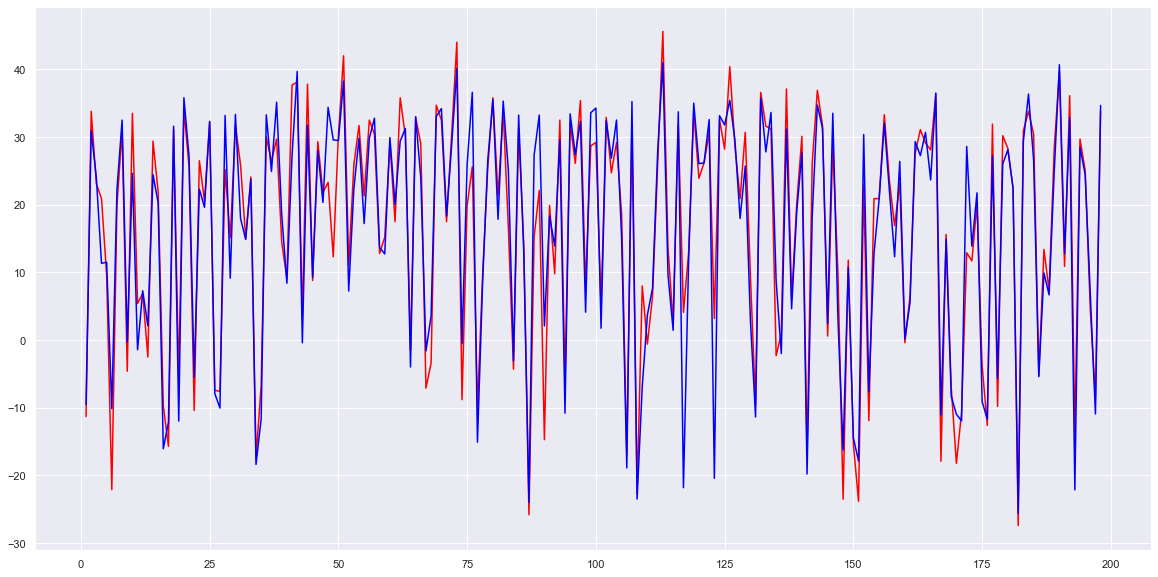

In [48]:
plt.figure(figsize=[20,10])
plt.plot(xa, ya1, label = "line 1",color='red')
plt.plot(xa, ya2, label = "line 2",color='blue')
plt.show()

In [61]:
ya2 = lin2.predict(poly.fit_transform(dfpred))

In [62]:
ya2

array([-34.20728953, -33.65471354, -33.2292088 , ...,  31.36071664,
        31.30381132,  31.24751049])

In [65]:
cv= ['Temp']
predict = pd.DataFrame(data = ya2, columns = cv)
predict

,Temp
0,-34.207290
1,-33.654714
2,-33.229209
3,-32.018513
4,-31.555917
...,...
827923,31.176198
827924,31.210907
827925,31.360717
827926,31.303811


In [70]:
horizontal_stack = pd.concat([dfpred, predict], axis=1)
horizontal_stack

,index,Lat,Long,Prec,Year,Month,Temp
0,3311712,-34.5,83.5,11.6,2014,1.0,-34.207290
1,3311713,-34.5,83.0,13.5,2014,1.0,-33.654714
2,3311714,-34.5,82.5,14.5,2014,1.0,-33.229209
3,3311715,-34.5,82.0,21.1,2014,1.0,-32.018513
4,3311716,-34.5,81.5,22.4,2014,1.0,-31.555917
...,...,...,...,...,...,...,...
827923,4139635,-11.0,8.5,46.6,2014,12.0,31.176198
827924,4139636,-11.0,8.0,56.9,2014,12.0,31.210907
827925,4139637,-11.0,7.5,59.0,2014,12.0,31.360717
827926,4139638,-11.0,7.0,78.2,2014,12.0,31.303811


In [68]:
dfpred = dfpred.reset_index()


In [69]:
dfpred

,index,Lat,Long,Prec,Year,Month
0,3311712,-34.5,83.5,11.6,2014,1.0
1,3311713,-34.5,83.0,13.5,2014,1.0
2,3311714,-34.5,82.5,14.5,2014,1.0
3,3311715,-34.5,82.0,21.1,2014,1.0
4,3311716,-34.5,81.5,22.4,2014,1.0
...,...,...,...,...,...,...
827923,4139635,-11.0,8.5,46.6,2014,12.0
827924,4139636,-11.0,8.0,56.9,2014,12.0
827925,4139637,-11.0,7.5,59.0,2014,12.0
827926,4139638,-11.0,7.0,78.2,2014,12.0


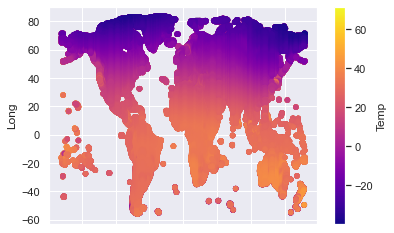

In [73]:
viz2 = horizontal_stack.plot.scatter(x='Lat',y='Long',c='Temp',colormap='plasma')

# 2015 Prediction

In [27]:
df2015= pd.read_csv('2015_p.csv')

In [31]:
cols= ['Temp']
df2015input = df2015[['Lat', 'Long', 'Prec','Year','Month']]
df2015input

,Lat,Long,Prec,Year,Month
0,-34.5,83.5,11.558559,2015,1
1,-34.5,83.0,13.478873,2015,1
2,-34.5,82.5,14.451389,2015,1
3,-34.5,82.0,21.071506,2015,1
4,-34.5,81.5,22.390317,2015,1
...,...,...,...,...,...
827923,-11.0,8.5,44.533081,2015,12
827924,-11.0,8.0,56.273324,2015,12
827925,-11.0,7.5,59.848377,2015,12
827926,-11.0,7.0,80.277227,2015,12


In [30]:
predict2015 = lin2.predict(poly.fit_transform(df2015input))

In [32]:
output2015 = pd.DataFrame(data = predict2015, columns = cols)
output2015

,Temp
0,-35.097554
1,-34.533152
2,-34.102219
3,-32.882866
4,-32.408791
...,...
827923,31.008464
827924,31.021541
827925,31.151353
827926,31.092128


In [33]:
final2015 = pd.concat([df2015input, output2015], axis=1)
final2015

,Lat,Long,Prec,Year,Month,Temp
0,-34.5,83.5,11.558559,2015,1,-35.097554
1,-34.5,83.0,13.478873,2015,1,-34.533152
2,-34.5,82.5,14.451389,2015,1,-34.102219
3,-34.5,82.0,21.071506,2015,1,-32.882866
4,-34.5,81.5,22.390317,2015,1,-32.408791
...,...,...,...,...,...,...
827923,-11.0,8.5,44.533081,2015,12,31.008464
827924,-11.0,8.0,56.273324,2015,12,31.021541
827925,-11.0,7.5,59.848377,2015,12,31.151353
827926,-11.0,7.0,80.277227,2015,12,31.092128


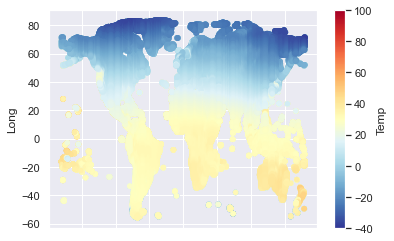

In [100]:
viz = final2015.plot.scatter(x='Lat',y='Long',c='Temp',vmin=-40,vmax=100,colormap='RdYlBu_r')

In [35]:
final2015.to_csv(r'C:\Users\Gaurav Singh\Desktop\finalyeare\data-20201127T111508Z-001\data\final2015.csv', index = False, header=True)

# 2016 Prediction

In [36]:
df2016= pd.read_csv('2016_p.csv')

In [37]:

df2016input = df2016[['Lat', 'Long', 'Prec','Year','Month']]
df2016input

,Lat,Long,Prec,Year,Month
0,-34.5,83.5,11.558559,2016,1
1,-34.5,83.0,13.478873,2016,1
2,-34.5,82.5,14.451389,2016,1
3,-34.5,82.0,21.071506,2016,1
4,-34.5,81.5,22.390317,2016,1
...,...,...,...,...,...
827923,-11.0,8.5,42.253462,2016,12
827924,-11.0,8.0,51.349349,2016,12
827925,-11.0,7.5,52.264937,2016,12
827926,-11.0,7.0,70.118108,2016,12


In [38]:
predict2016 = lin2.predict(poly.fit_transform(df2016input))

In [39]:
output2016 = pd.DataFrame(data = predict2016, columns = cols)
output2016

,Temp
0,-36.196200
1,-35.625097
2,-35.184148
3,-33.974834
4,-33.492066
...,...
827923,30.827941
827924,30.869155
827925,31.031093
827926,30.973220


In [40]:
final2016 = pd.concat([df2016input, output2016], axis=1)
final2016

,Lat,Long,Prec,Year,Month,Temp
0,-34.5,83.5,11.558559,2016,1,-36.196200
1,-34.5,83.0,13.478873,2016,1,-35.625097
2,-34.5,82.5,14.451389,2016,1,-35.184148
3,-34.5,82.0,21.071506,2016,1,-33.974834
4,-34.5,81.5,22.390317,2016,1,-33.492066
...,...,...,...,...,...,...
827923,-11.0,8.5,42.253462,2016,12,30.827941
827924,-11.0,8.0,51.349349,2016,12,30.869155
827925,-11.0,7.5,52.264937,2016,12,31.031093
827926,-11.0,7.0,70.118108,2016,12,30.973220


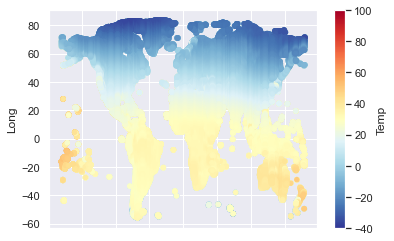

In [97]:
viz = final2016.plot.scatter(x='Lat',y='Long',c='Temp',vmin=-40,vmax=100,colormap='RdYlBu_r')

In [42]:
final2016.to_csv(r'C:\Users\Gaurav Singh\Desktop\finalyeare\data-20201127T111508Z-001\data\final2016.csv', index = False, header=True)

# 2017 Prediction

In [43]:
df2017= pd.read_csv('2017_p.csv')

In [44]:

df2017input = df2017[['Lat', 'Long', 'Prec','Year','Month']]
df2017input

,Lat,Long,Prec,Year,Month
0,-34.5,83.5,11.558559,2017,1
1,-34.5,83.0,13.478873,2017,1
2,-34.5,82.5,14.451389,2017,1
3,-34.5,82.0,21.071506,2017,1
4,-34.5,81.5,22.390317,2017,1
...,...,...,...,...,...
827923,-11.0,8.5,46.644885,2017,12
827924,-11.0,8.0,56.889470,2017,12
827925,-11.0,7.5,58.957181,2017,12
827926,-11.0,7.0,78.206428,2017,12


In [45]:
predict2017 = lin2.predict(poly.fit_transform(df2017input))

In [46]:
output2017 = pd.DataFrame(data = predict2017, columns = cols)
output2017

,Temp
0,-37.513718
1,-36.938016
2,-36.486311
3,-35.302823
4,-34.811509
...,...
827923,30.518900
827924,30.541901
827925,30.685494
827926,30.624980


In [47]:
final2017 = pd.concat([df2017input, output2017], axis=1)
final2017

,Lat,Long,Prec,Year,Month,Temp
0,-34.5,83.5,11.558559,2017,1,-37.513718
1,-34.5,83.0,13.478873,2017,1,-36.938016
2,-34.5,82.5,14.451389,2017,1,-36.486311
3,-34.5,82.0,21.071506,2017,1,-35.302823
4,-34.5,81.5,22.390317,2017,1,-34.811509
...,...,...,...,...,...,...
827923,-11.0,8.5,46.644885,2017,12,30.518900
827924,-11.0,8.0,56.889470,2017,12,30.541901
827925,-11.0,7.5,58.957181,2017,12,30.685494
827926,-11.0,7.0,78.206428,2017,12,30.624980


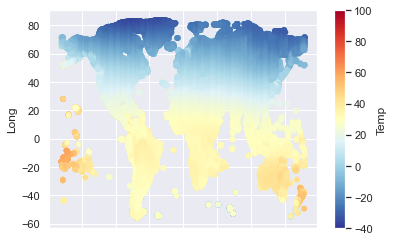

In [96]:
viz = final2017.plot.scatter(x='Lat',y='Long',c='Temp',vmin=-40,vmax=100,colormap='RdYlBu_r')

In [49]:
final2017.to_csv(r'C:\Users\Gaurav Singh\Desktop\finalyeare\data-20201127T111508Z-001\data\final2017.csv', index = False, header=True)

# 2018 Prediction

In [50]:
df2018= pd.read_csv('2018_p.csv')

In [51]:

df2018input = df2018[['Lat', 'Long', 'Prec','Year','Month']]
df2018input

,Lat,Long,Prec,Year,Month
0,-34.5,83.5,11.558559,2018,1
1,-34.5,83.0,13.478873,2018,1
2,-34.5,82.5,14.451389,2018,1
3,-34.5,82.0,21.071506,2018,1
4,-34.5,81.5,22.390317,2018,1
...,...,...,...,...,...
827923,-11.0,8.5,46.644885,2018,12
827924,-11.0,8.0,56.889470,2018,12
827925,-11.0,7.5,58.957181,2018,12
827926,-11.0,7.0,78.206428,2018,12


In [52]:
predict2018 = lin2.predict(poly.fit_transform(df2018input))

In [53]:
output2018 = pd.DataFrame(data = predict2018, columns = cols)
output2018

,Temp
0,-39.054533
1,-38.476338
2,-38.013139
3,-36.871274
4,-36.371562
...,...
827923,30.251086
827924,30.258648
827925,30.396797
827926,30.319067


In [54]:
final2018 = pd.concat([df2018input, output2018], axis=1)
final2018

,Lat,Long,Prec,Year,Month,Temp
0,-34.5,83.5,11.558559,2018,1,-39.054533
1,-34.5,83.0,13.478873,2018,1,-38.476338
2,-34.5,82.5,14.451389,2018,1,-38.013139
3,-34.5,82.0,21.071506,2018,1,-36.871274
4,-34.5,81.5,22.390317,2018,1,-36.371562
...,...,...,...,...,...,...
827923,-11.0,8.5,46.644885,2018,12,30.251086
827924,-11.0,8.0,56.889470,2018,12,30.258648
827925,-11.0,7.5,58.957181,2018,12,30.396797
827926,-11.0,7.0,78.206428,2018,12,30.319067


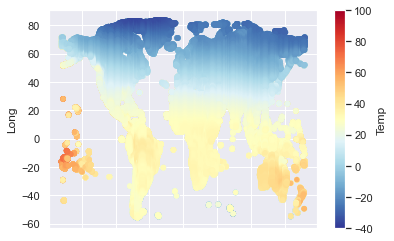

In [95]:
viz = final2018.plot.scatter(x='Lat',y='Long',c='Temp',vmin=-40,vmax=100,colormap='RdYlBu_r')

In [56]:
final2018.to_csv(r'C:\Users\Gaurav Singh\Desktop\finalyeare\data-20201127T111508Z-001\data\final2018.csv', index = False, header=True)

# Prediction 2019

In [138]:
prec2019['Prec']=(prec2018['Prec']+prec2017['Prec'])/2

<ipython-input-138-a85d76a28215>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prec2019['Prec']=(prec2018['Prec']+prec2017['Prec'])/2


In [126]:
dataa = {''}

0          11.558559
1          13.478873
2          14.451389
3          21.071506
4          22.390317
             ...    
827923     46.644885
827924     56.889470
827925     58.957181
827926     78.206428
827927    104.027597
Name: Prec, Length: 827928, dtype: float64

In [132]:
prec2019 = prec2018[['Lat','Long','Month']]

In [136]:
prec2019['Prec'] = ''

<ipython-input-136-8f9c44052050>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prec2019['Prec'] = ''


In [143]:
list1 = []
for i in range(0,827928):
    list1.append(2019)

In [145]:
prec2019['Year'] = list1

In [147]:
prec2019 = prec2019[['Lat', 'Long', 'Prec','Year','Month']]

In [149]:
df2019input = prec2019[['Lat', 'Long', 'Prec','Year','Month']]
df2019input

,Lat,Long,Prec,Year,Month
0,-34.5,83.5,11.558559,2019,1
1,-34.5,83.0,13.478873,2019,1
2,-34.5,82.5,14.451389,2019,1
3,-34.5,82.0,21.071506,2019,1
4,-34.5,81.5,22.390317,2019,1
...,...,...,...,...,...
827923,-11.0,8.5,46.644885,2019,12
827924,-11.0,8.0,56.889470,2019,12
827925,-11.0,7.5,58.957181,2019,12
827926,-11.0,7.0,78.206428,2019,12


In [150]:
predict2019 = lin2.predict(poly.fit_transform(df2019input))

In [151]:
output2019 = pd.DataFrame(data = predict2019, columns = cols)
output2019

,Temp
0,-40.823075
1,-40.244498
2,-39.769073
3,-38.684635
4,-38.176678
...,...
827923,29.950792
827924,29.937269
827925,30.068352
827926,29.965270


In [152]:
final2019 = pd.concat([df2019input, output2019], axis=1)
final2019

,Lat,Long,Prec,Year,Month,Temp
0,-34.5,83.5,11.558559,2019,1,-40.823075
1,-34.5,83.0,13.478873,2019,1,-40.244498
2,-34.5,82.5,14.451389,2019,1,-39.769073
3,-34.5,82.0,21.071506,2019,1,-38.684635
4,-34.5,81.5,22.390317,2019,1,-38.176678
...,...,...,...,...,...,...
827923,-11.0,8.5,46.644885,2019,12,29.950792
827924,-11.0,8.0,56.889470,2019,12,29.937269
827925,-11.0,7.5,58.957181,2019,12,30.068352
827926,-11.0,7.0,78.206428,2019,12,29.965270


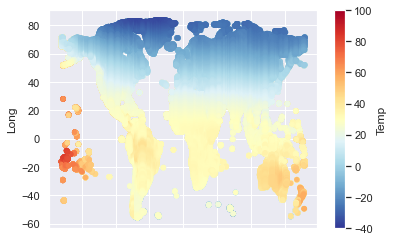

In [153]:
viz = final2019.plot.scatter(x='Lat',y='Long',c='Temp',vmin=-40,vmax=100,colormap='RdYlBu_r')

In [154]:
final2019.to_csv(r'C:\Users\Gaurav Singh\Desktop\finalyeare\data-20201127T111508Z-001\data\final2019.csv', index = False, header=True)

# 2020 Prediction

In [155]:
prec2020 = prec2018[['Lat','Long','Month']]

In [156]:
prec2020['Prec'] = ''

<ipython-input-156-970c2346f4ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prec2020['Prec'] = ''


In [157]:
prec2020['Prec']=(prec2018['Prec']+prec2019['Prec'])/2

<ipython-input-157-433460838a7f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prec2020['Prec']=(prec2018['Prec']+prec2019['Prec'])/2


In [158]:
list1 = []
for i in range(0,827928):
    list1.append(2020)

In [159]:
prec2020['Year'] = list1

In [160]:
prec2020 = prec2020[['Lat', 'Long', 'Prec','Year','Month']]

In [161]:
df2020input = prec2020[['Lat', 'Long', 'Prec','Year','Month']]
df2020input

,Lat,Long,Prec,Year,Month
0,-34.5,83.5,11.558559,2020,1
1,-34.5,83.0,13.478873,2020,1
2,-34.5,82.5,14.451389,2020,1
3,-34.5,82.0,21.071506,2020,1
4,-34.5,81.5,22.390317,2020,1
...,...,...,...,...,...
827923,-11.0,8.5,46.644885,2020,12
827924,-11.0,8.0,56.889470,2020,12
827925,-11.0,7.5,58.957181,2020,12
827926,-11.0,7.0,78.206428,2020,12


In [162]:
predict2020 = lin2.predict(poly.fit_transform(df2020input))

In [163]:
output2020 = pd.DataFrame(data = predict2020, columns = cols)
output2020

,Temp
0,-42.823785
1,-42.246940
2,-41.758560
3,-40.747360
4,-40.231315
...,...
827923,29.613204
827924,29.572941
827925,29.695330
827926,29.558743


In [164]:
final2020 = pd.concat([df2020input, output2020], axis=1)
final2020

,Lat,Long,Prec,Year,Month,Temp
0,-34.5,83.5,11.558559,2020,1,-42.823785
1,-34.5,83.0,13.478873,2020,1,-42.246940
2,-34.5,82.5,14.451389,2020,1,-41.758560
3,-34.5,82.0,21.071506,2020,1,-40.747360
4,-34.5,81.5,22.390317,2020,1,-40.231315
...,...,...,...,...,...,...
827923,-11.0,8.5,46.644885,2020,12,29.613204
827924,-11.0,8.0,56.889470,2020,12,29.572941
827925,-11.0,7.5,58.957181,2020,12,29.695330
827926,-11.0,7.0,78.206428,2020,12,29.558743


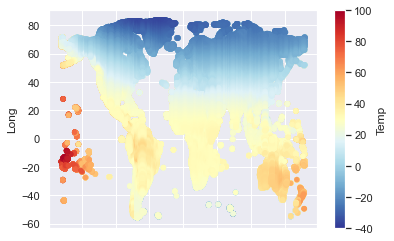

In [165]:
viz = final2020.plot.scatter(x='Lat',y='Long',c='Temp',vmin=-40,vmax=100,colormap='RdYlBu_r')

In [166]:
final2020.to_csv(r'C:\Users\Gaurav Singh\Desktop\finalyeare\data-20201127T111508Z-001\data\final2020.csv', index = False, header=True)

# 2021 Prediction

In [167]:
prec2021 = prec2018[['Lat','Long','Month']]

In [168]:
prec2021['Prec'] = ''

<ipython-input-168-f2996ef13a9c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prec2021['Prec'] = ''


In [169]:
prec2021['Prec']=(prec2020['Prec']+prec2019['Prec'])/2

<ipython-input-169-4a4721448191>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prec2021['Prec']=(prec2020['Prec']+prec2019['Prec'])/2


In [170]:
list1 = []
for i in range(0,827928):
    list1.append(2021)

In [171]:
prec2021['Year'] = list1

In [172]:
prec2021 = prec2021[['Lat', 'Long', 'Prec','Year','Month']]

In [173]:
df2021input = prec2021[['Lat', 'Long', 'Prec','Year','Month']]
df2021input

,Lat,Long,Prec,Year,Month
0,-34.5,83.5,11.558559,2021,1
1,-34.5,83.0,13.478873,2021,1
2,-34.5,82.5,14.451389,2021,1
3,-34.5,82.0,21.071506,2021,1
4,-34.5,81.5,22.390317,2021,1
...,...,...,...,...,...
827923,-11.0,8.5,46.644885,2021,12
827924,-11.0,8.0,56.889470,2021,12
827925,-11.0,7.5,58.957181,2021,12
827926,-11.0,7.0,78.206428,2021,12


In [174]:
predict2021 = lin2.predict(poly.fit_transform(df2021input))

In [175]:
output2021 = pd.DataFrame(data = predict2021, columns = cols)
output2021

,Temp
0,-45.061108
1,-44.488115
2,-43.986055
3,-43.063910
4,-42.539940
...,...
827923,29.233498
827924,29.160830
827925,29.272895
827926,29.094636


In [176]:
final2021 = pd.concat([df2021input, output2021], axis=1)
final2021

,Lat,Long,Prec,Year,Month,Temp
0,-34.5,83.5,11.558559,2021,1,-45.061108
1,-34.5,83.0,13.478873,2021,1,-44.488115
2,-34.5,82.5,14.451389,2021,1,-43.986055
3,-34.5,82.0,21.071506,2021,1,-43.063910
4,-34.5,81.5,22.390317,2021,1,-42.539940
...,...,...,...,...,...,...
827923,-11.0,8.5,46.644885,2021,12,29.233498
827924,-11.0,8.0,56.889470,2021,12,29.160830
827925,-11.0,7.5,58.957181,2021,12,29.272895
827926,-11.0,7.0,78.206428,2021,12,29.094636


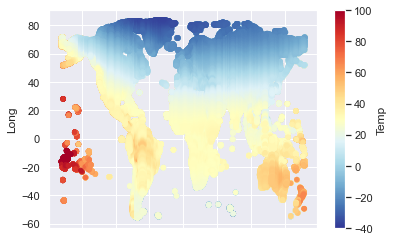

In [177]:
viz = final2021.plot.scatter(x='Lat',y='Long',c='Temp',vmin=-40,vmax=100,colormap='RdYlBu_r')

In [178]:
final2021.to_csv(r'C:\Users\Gaurav Singh\Desktop\finalyeare\data-20201127T111508Z-001\data\final2021.csv', index = False, header=True)

# 2022 Prediction

In [179]:
prec2022 = prec2018[['Lat','Long','Month']]

In [180]:
prec2022['Prec'] = ''

<ipython-input-180-11abfdf64017>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prec2022['Prec'] = ''


In [181]:
prec2022['Prec']=(prec2021['Prec']+prec2020['Prec'])/2

<ipython-input-181-5db42ae30620>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prec2022['Prec']=(prec2021['Prec']+prec2020['Prec'])/2


In [182]:
list1 = []
for i in range(0,827928):
    list1.append(2022)

In [183]:
prec2022['Year'] = list1

In [184]:
prec2022 = prec2022[['Lat', 'Long', 'Prec','Year','Month']]

In [185]:
df2022input = prec2022[['Lat', 'Long', 'Prec','Year','Month']]
df2022input

,Lat,Long,Prec,Year,Month
0,-34.5,83.5,11.558559,2022,1
1,-34.5,83.0,13.478873,2022,1
2,-34.5,82.5,14.451389,2022,1
3,-34.5,82.0,21.071506,2022,1
4,-34.5,81.5,22.390317,2022,1
...,...,...,...,...,...
827923,-11.0,8.5,46.644885,2022,12
827924,-11.0,8.0,56.889470,2022,12
827925,-11.0,7.5,58.957181,2022,12
827926,-11.0,7.0,78.206428,2022,12


In [186]:
predict2022 = lin2.predict(poly.fit_transform(df2022input))

In [187]:
output2022 = pd.DataFrame(data = predict2022, columns = cols)
output2022

,Temp
0,-47.539498
1,-46.972481
2,-46.456019
3,-45.638756
4,-45.107026
...,...
827923,28.806844
827924,28.696098
827925,28.796203
827926,28.568089


In [188]:
final2022 = pd.concat([df2022input, output2022], axis=1)
final2022

,Lat,Long,Prec,Year,Month,Temp
0,-34.5,83.5,11.558559,2022,1,-47.539498
1,-34.5,83.0,13.478873,2022,1,-46.972481
2,-34.5,82.5,14.451389,2022,1,-46.456019
3,-34.5,82.0,21.071506,2022,1,-45.638756
4,-34.5,81.5,22.390317,2022,1,-45.107026
...,...,...,...,...,...,...
827923,-11.0,8.5,46.644885,2022,12,28.806844
827924,-11.0,8.0,56.889470,2022,12,28.696098
827925,-11.0,7.5,58.957181,2022,12,28.796203
827926,-11.0,7.0,78.206428,2022,12,28.568089


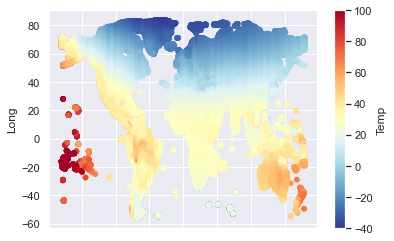

In [189]:
viz = final2022.plot.scatter(x='Lat',y='Long',c='Temp',vmin=-40,vmax=100,colormap='RdYlBu_r')

In [190]:
final2022.to_csv(r'C:\Users\Gaurav Singh\Desktop\finalyeare\data-20201127T111508Z-001\data\final2022.csv', index = False, header=True)

# 2023 prediction

In [191]:
prec2023 = prec2018[['Lat','Long','Month']]

In [192]:
prec2023['Prec'] = ''

<ipython-input-192-af5b857432ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prec2023['Prec'] = ''


In [193]:
prec2023['Prec']=(prec2021['Prec']+prec2022['Prec'])/2

<ipython-input-193-d8ba09dae5f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prec2023['Prec']=(prec2021['Prec']+prec2022['Prec'])/2


In [194]:
list1 = []
for i in range(0,827928):
    list1.append(2023)

In [195]:
prec2023['Year'] = list1

In [196]:
prec2023 = prec2023[['Lat', 'Long', 'Prec','Year','Month']]

In [197]:
df2023input = prec2023[['Lat', 'Long', 'Prec','Year','Month']]
df2023input

,Lat,Long,Prec,Year,Month
0,-34.5,83.5,11.558559,2023,1
1,-34.5,83.0,13.478873,2023,1
2,-34.5,82.5,14.451389,2023,1
3,-34.5,82.0,21.071506,2023,1
4,-34.5,81.5,22.390317,2023,1
...,...,...,...,...,...
827923,-11.0,8.5,46.644885,2023,12
827924,-11.0,8.0,56.889470,2023,12
827925,-11.0,7.5,58.957181,2023,12
827926,-11.0,7.0,78.206428,2023,12


In [198]:
predict2023 = lin2.predict(poly.fit_transform(df2023input))

In [199]:
output2023 = pd.DataFrame(data = predict2023, columns = cols)
output2023

,Temp
0,-50.263416
1,-49.704503
2,-49.172923
3,-48.476373
4,-47.937052
...,...
827923,28.328406
827924,28.173897
827925,28.260403
827926,27.974238


In [200]:
final2023 = pd.concat([df2023input, output2023], axis=1)
final2023

,Lat,Long,Prec,Year,Month,Temp
0,-34.5,83.5,11.558559,2023,1,-50.263416
1,-34.5,83.0,13.478873,2023,1,-49.704503
2,-34.5,82.5,14.451389,2023,1,-49.172923
3,-34.5,82.0,21.071506,2023,1,-48.476373
4,-34.5,81.5,22.390317,2023,1,-47.937052
...,...,...,...,...,...,...
827923,-11.0,8.5,46.644885,2023,12,28.328406
827924,-11.0,8.0,56.889470,2023,12,28.173897
827925,-11.0,7.5,58.957181,2023,12,28.260403
827926,-11.0,7.0,78.206428,2023,12,27.974238


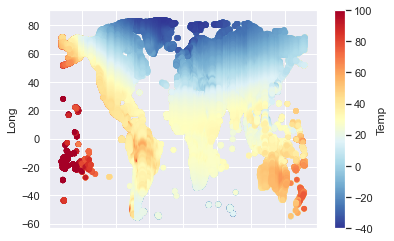

In [201]:
viz = final2023.plot.scatter(x='Lat',y='Long',c='Temp',vmin=-40,vmax=100,colormap='RdYlBu_r')

In [202]:
final2023.to_csv(r'C:\Users\Gaurav Singh\Desktop\finalyeare\data-20201127T111508Z-001\data\final2023.csv', index = False, header=True)

# 2024 Prediction

In [203]:
prec2024 = prec2018[['Lat','Long','Month']]

In [156]:
prec2024['Prec'] = ''

<ipython-input-156-970c2346f4ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prec2020['Prec'] = ''


In [204]:
prec2024['Prec']=(prec2022['Prec']+prec2023['Prec'])/2

<ipython-input-204-0e6b4586a9b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prec2024['Prec']=(prec2022['Prec']+prec2023['Prec'])/2


In [205]:
list1 = []
for i in range(0,827928):
    list1.append(2024)

In [206]:
prec2024['Year'] = list1

In [207]:
prec2024 = prec2024[['Lat', 'Long', 'Prec','Year','Month']]

In [208]:
df2024input = prec2024[['Lat', 'Long', 'Prec','Year','Month']]
df2024input

,Lat,Long,Prec,Year,Month
0,-34.5,83.5,11.558559,2024,1
1,-34.5,83.0,13.478873,2024,1
2,-34.5,82.5,14.451389,2024,1
3,-34.5,82.0,21.071506,2024,1
4,-34.5,81.5,22.390317,2024,1
...,...,...,...,...,...
827923,-11.0,8.5,46.644885,2024,12
827924,-11.0,8.0,56.889470,2024,12
827925,-11.0,7.5,58.957181,2024,12
827926,-11.0,7.0,78.206428,2024,12


In [209]:
predict2024 = lin2.predict(poly.fit_transform(df2024input))

In [210]:
output2024 = pd.DataFrame(data = predict2024, columns = cols)
output2024

,Temp
0,-53.237329
1,-52.688654
2,-52.141241
3,-51.581244
4,-51.034507
...,...
827923,27.793339
827924,27.589374
827925,27.660635
827926,27.308207


In [211]:
final2024 = pd.concat([df2024input, output2024], axis=1)
final2024

,Lat,Long,Prec,Year,Month,Temp
0,-34.5,83.5,11.558559,2024,1,-53.237329
1,-34.5,83.0,13.478873,2024,1,-52.688654
2,-34.5,82.5,14.451389,2024,1,-52.141241
3,-34.5,82.0,21.071506,2024,1,-51.581244
4,-34.5,81.5,22.390317,2024,1,-51.034507
...,...,...,...,...,...,...
827923,-11.0,8.5,46.644885,2024,12,27.793339
827924,-11.0,8.0,56.889470,2024,12,27.589374
827925,-11.0,7.5,58.957181,2024,12,27.660635
827926,-11.0,7.0,78.206428,2024,12,27.308207


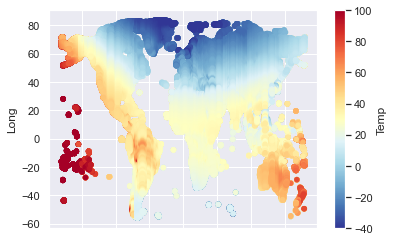

In [212]:
viz = final2024.plot.scatter(x='Lat',y='Long',c='Temp',vmin=-40,vmax=100,colormap='RdYlBu_r')

In [213]:
final2024.to_csv(r'C:\Users\Gaurav Singh\Desktop\finalyeare\data-20201127T111508Z-001\data\final2024.csv', index = False, header=True)

# 2025 Prediction

In [214]:
prec2025 = prec2018[['Lat','Long','Month']]

In [215]:
prec2025['Prec'] = ''

<ipython-input-215-b7fad98f387e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prec2025['Prec'] = ''


In [216]:
prec2025['Prec']=(prec2023['Prec']+prec2024['Prec'])/2

<ipython-input-216-594612566b9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prec2025['Prec']=(prec2023['Prec']+prec2024['Prec'])/2


In [217]:
list1 = []
for i in range(0,827928):
    list1.append(2025)

In [218]:
prec2025['Year'] = list1

In [219]:
prec2025 = prec2025[['Lat', 'Long', 'Prec','Year','Month']]

In [220]:
df2025input = prec2025[['Lat', 'Long', 'Prec','Year','Month']]
df2025input

,Lat,Long,Prec,Year,Month
0,-34.5,83.5,11.558559,2025,1
1,-34.5,83.0,13.478873,2025,1
2,-34.5,82.5,14.451389,2025,1
3,-34.5,82.0,21.071506,2025,1
4,-34.5,81.5,22.390317,2025,1
...,...,...,...,...,...
827923,-11.0,8.5,46.644885,2025,12
827924,-11.0,8.0,56.889470,2025,12
827925,-11.0,7.5,58.957181,2025,12
827926,-11.0,7.0,78.206428,2025,12


In [221]:
predict2025 = lin2.predict(poly.fit_transform(df2025input))

In [222]:
output2025 = pd.DataFrame(data = predict2025, columns = cols)
output2025

,Temp
0,-56.465714
1,-55.929412
2,-55.365458
3,-54.957862
4,-54.403886
...,...
827923,27.196791
827924,26.937669
827925,26.992036
827926,26.565118


In [223]:
final2025 = pd.concat([df2025input, output2025], axis=1)
final2025

,Lat,Long,Prec,Year,Month,Temp
0,-34.5,83.5,11.558559,2025,1,-56.465714
1,-34.5,83.0,13.478873,2025,1,-55.929412
2,-34.5,82.5,14.451389,2025,1,-55.365458
3,-34.5,82.0,21.071506,2025,1,-54.957862
4,-34.5,81.5,22.390317,2025,1,-54.403886
...,...,...,...,...,...,...
827923,-11.0,8.5,46.644885,2025,12,27.196791
827924,-11.0,8.0,56.889470,2025,12,26.937669
827925,-11.0,7.5,58.957181,2025,12,26.992036
827926,-11.0,7.0,78.206428,2025,12,26.565118


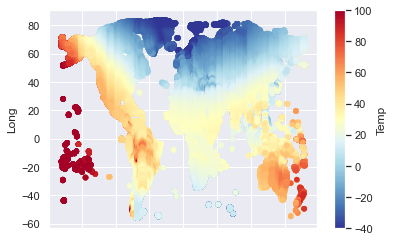

In [224]:
viz = final2025.plot.scatter(x='Lat',y='Long',c='Temp',vmin=-40,vmax=100,colormap='RdYlBu_r')

In [225]:
final2025.to_csv(r'C:\Users\Gaurav Singh\Desktop\finalyeare\data-20201127T111508Z-001\data\final2025.csv', index = False, header=True)